# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plot_config import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

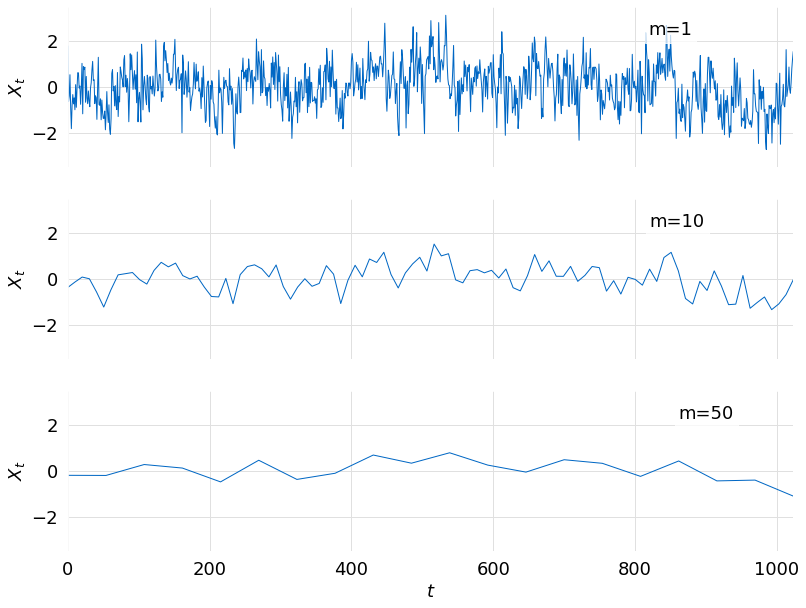

In [3]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [4]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.46e-59
Time:                        05:05:03   Log-Likelihood:                 177.88
No. Observations:                 100   AIC:                            -351.8
Df Residuals:                      98   BIC:                            -346.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1410      0.021      6.562      0.000       0.098       0.184
x1            -0.5157      0.014    -36.810      0.000      -0.543      -0.488
==============================================================================
Omnibus:                        9.863   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.139
Skew:                          -0.638   Prob(JB):                      0.00629
Kurtosis:                       3.897   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

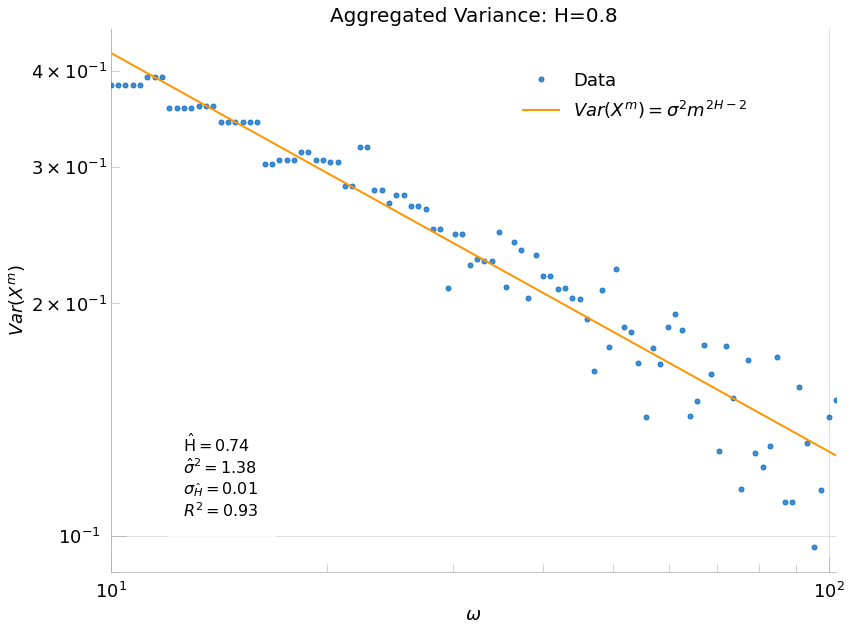

In [5]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

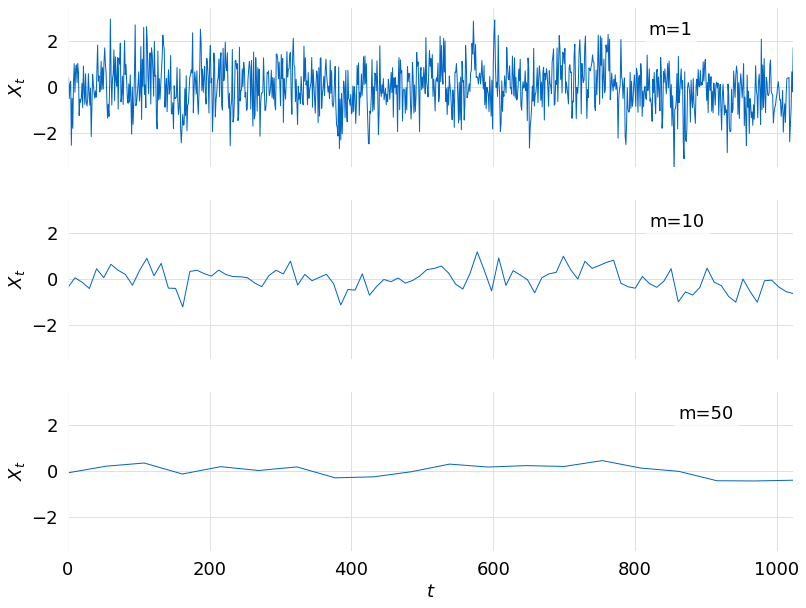

In [6]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [7]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1732.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           4.28e-64
Time:                        05:05:04   Log-Likelihood:                 173.97
No. Observations:                 100   AIC:                            -343.9
Df Residuals:                      98   BIC:                            -338.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0179      0.022     -0.802      0.424      -0.062       0.026
x1            -0.6062      0.015    -41.612      0.000      -0.635      -0.577
==============================================================================
Omnibus:                        0.921   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.449
Skew:                          -0.041   Prob(JB):                        0.799
Kurtosis:                       3.318   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

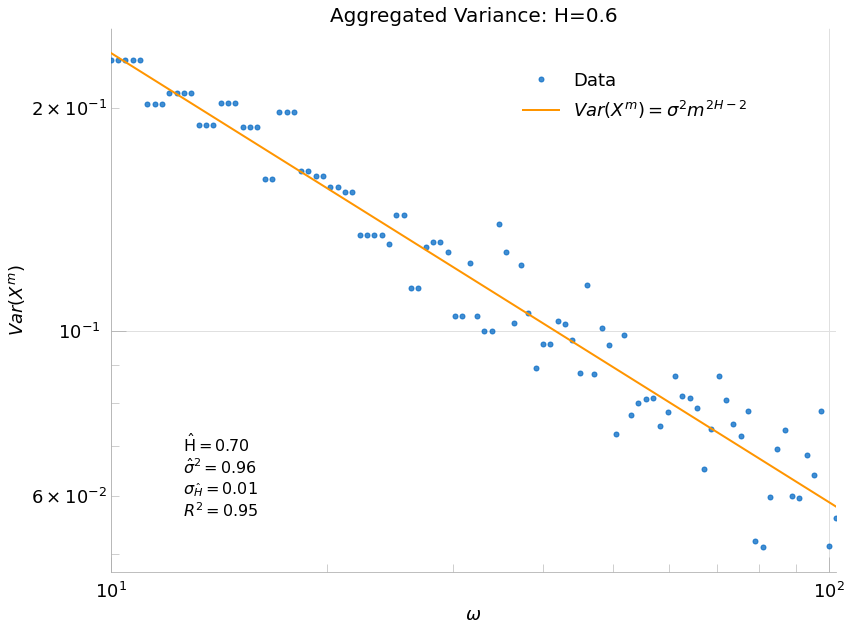

In [8]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

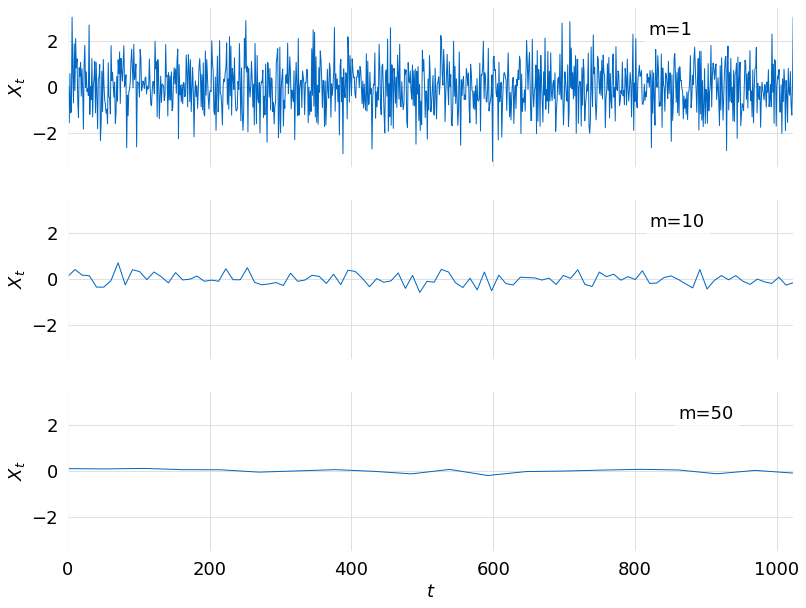

In [9]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [10]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1662.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.88e-63
Time:                        05:05:04   Log-Likelihood:                 110.65
No. Observations:                 100   AIC:                            -217.3
Df Residuals:                      98   BIC:                            -212.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1121      0.042     -2.663      0.009      -0.196      -0.029
x1            -1.1187      0.027    -40.766      0.000      -1.173      -1.064
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.713
Skew:                          -0.287   Prob(JB):                        0.425
Kurtosis:                       3.285   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

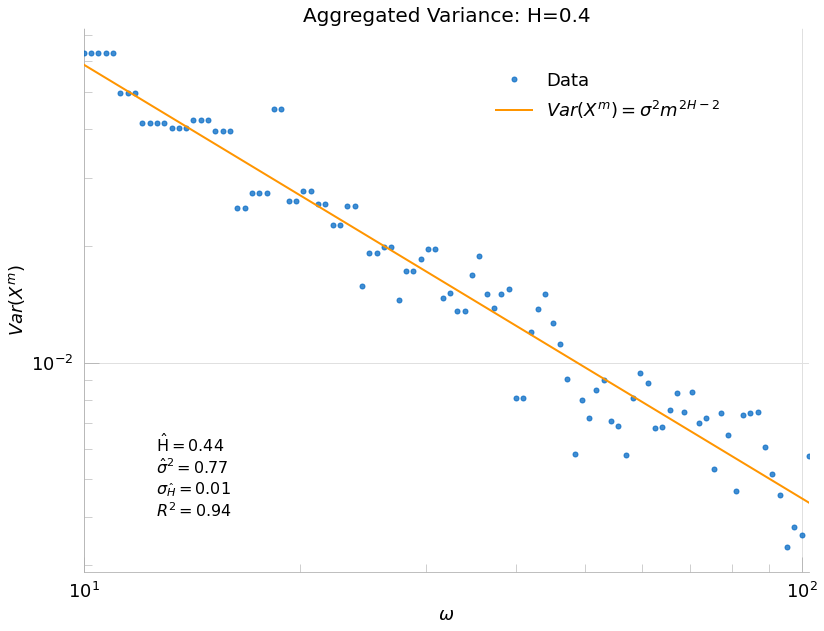

In [11]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

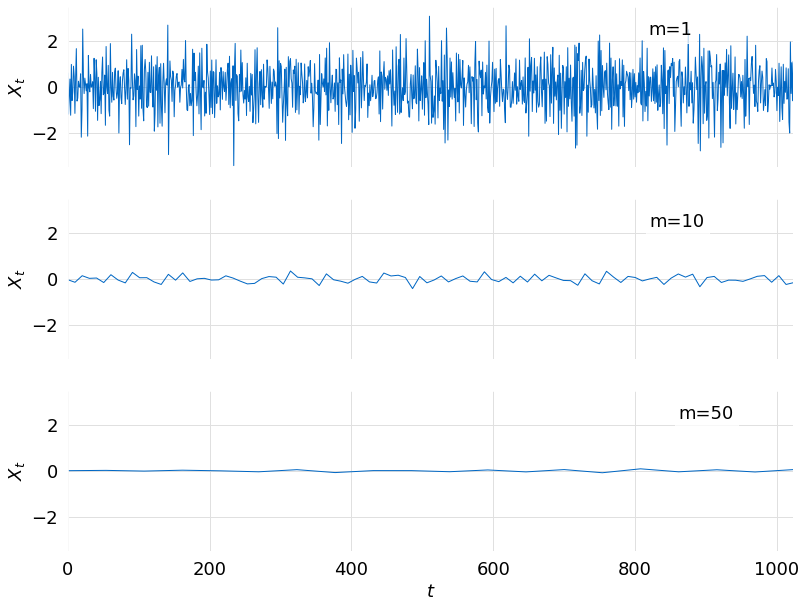

In [12]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [13]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1056.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.76e-54
Time:                        05:05:04   Log-Likelihood:                 37.782
No. Observations:                 100   AIC:                            -71.56
Df Residuals:                      98   BIC:                            -66.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3900      0.087      4.472      0.000       0.217       0.563
x1            -1.8482      0.057    -32.501      0.000      -1.961      -1.735
==============================================================================
Omnibus:                       24.779   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.444
Skew:                          -0.890   Prob(JB):                     3.36e-13
Kurtosis:                       6.259   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

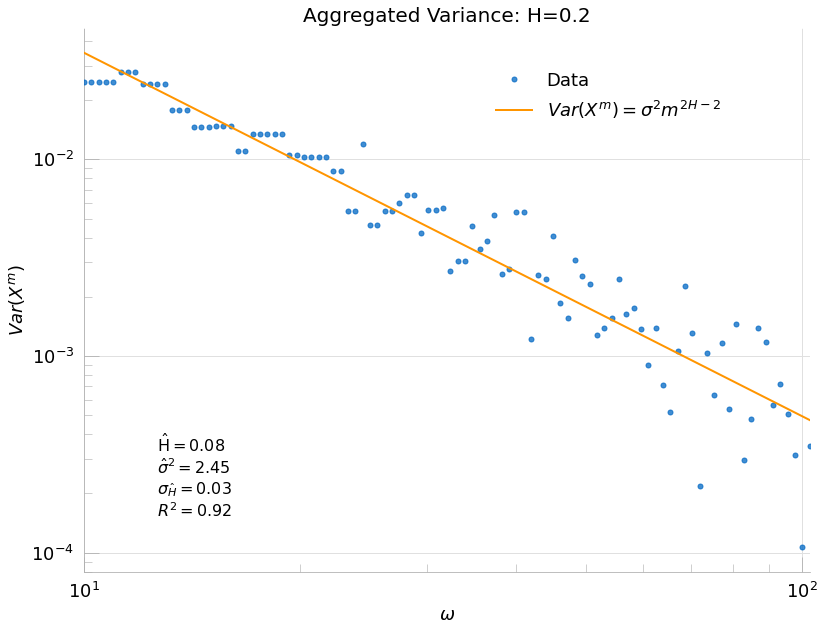

In [14]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)